In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

<Figure size 432x288 with 0 Axes>

In [25]:
df = pd.read_csv('Sample.csv')
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [27]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
print('--- Fitting Result ---')
print('[train]')
print('Mean Squared Error: {0:.2}'.format(mean_squared_error(y_train, y_pred_train)))
print('R2 score : {0:.2%}'.format(r2_score(y_train, y_pred_train)))
print('[test]')
print('Mean Squared Error: {0:.2}'.format(mean_squared_error(y_test, y_pred)))
print('R2 score : {0:.2%}'.format(r2_score(y_test, y_pred)))


--- Fitting Result ---
[train]
Mean Squared Error: 0.0047
R2 score : 97.58%
[test]
Mean Squared Error: 0.0035
R2 score : 95.46%


Text(0.5,1,'Plot : Goal - Prediction')

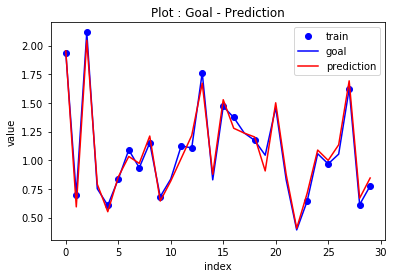

In [28]:
y_pred_all = model.predict(X)

plt.figure().patch.set_facecolor('xkcd:white')
plt.plot(y_train.index, y_train, 'o', label='train', color='blue')
plt.plot(np.arange(y.size), y, label='goal', color='blue')
plt.plot(np.arange(y.size), y_pred_all, label='prediction', color='red')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.title('Plot : Goal - Prediction')


Text(0.5,1,'Scatter : Goal - Prediction')

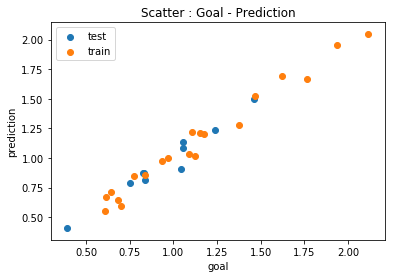

In [30]:
plt.figure().patch.set_facecolor('xkcd:white')
plt.scatter(y_test, y_pred, label='test')
plt.scatter(y_train, model.predict(X_train), label='train')
plt.xlabel('goal')
plt.ylabel('prediction')
plt.legend()
plt.title('Scatter : Goal - Prediction')


Text(0.5,1,'Plot : Residual - Argument')

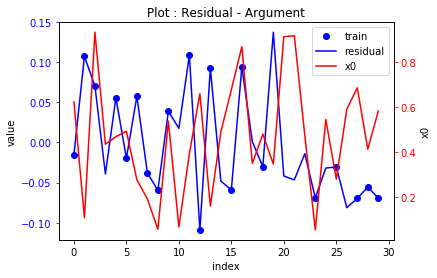

In [63]:
fig, ax1 = plt.subplots()
fig.patch.set_facecolor('xkcd:white')
color_1 = 'blue'
color_2 = 'red'
ax1.plot(y_train.index, y_train - y_pred_train, 'o', label='train', color='blue')
ax1.plot(np.arange(y.size), y - y_pred_all, label='residual', color=color_1)
ax2 = ax1.twinx()
ax2.plot(np.arange(y.size), X.iloc[:,1], label='x0', color=color_2)
ax1.set_xlabel('index')
ax1.set_ylabel('value')
ax2.set_ylabel('x0')

ax1.tick_params(axis='y', colors=color_1)
ax2.tick_params(axis='y', colors=color_2)

handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2)
plt.title('Plot : Residual - Argument')

Text(0,0.5,'residual')

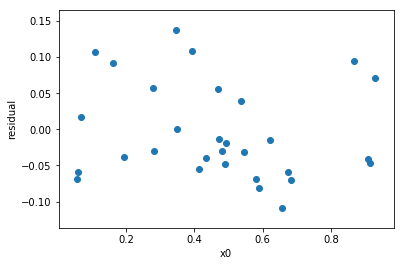

In [65]:
plt.scatter(X.iloc[:,1], y - y_pred_all)
plt.xlabel('x0')
plt.ylabel('residual')